# IBNR Runoff

In [1]:
import chainladder as cl

All IBNR models spin off several results triangles including ``inbr_``,
``ultimate_``, ``full_expectation``, and ``full_triangle_``.  These can be
manipulated into a variety of formats. This example demonstrates how to
create a calendar year runoff of IBNR.


In [2]:
# Create a triangle
triangle = cl.load_sample('genins')

# Fit a model
model = cl.Chainladder().fit(triangle)

# Develop IBNR runoff triangle
runoff = (model.full_triangle_.cum_to_incr() - triangle.cum_to_incr())

# Convert to calendar period and aggregate across all accident years
cal_yr_runoff = runoff[runoff.valuation > triangle.valuation_date]
cal_yr_runoff = cal_yr_runoff.dev_to_val().sum(axis='origin')

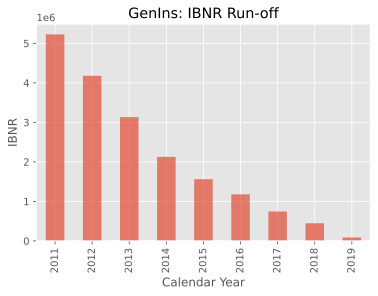

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot results
ax = cal_yr_runoff.dropna().T.plot(
    kind='bar', legend=False,
    title='GenIns: IBNR Run-off', alpha=0.7,
    xlabel='Calendar Year', ylabel='IBNR');

In [4]:
from myst_nb import glue
glue("plot_ibnr_runoff", ax.get_figure(), display=False)